# 教養としてのアルゴリズムとデータ構造

* 以下の各問について、問の次（もしくはその次）にあるコードセルに解答すること。
    * 特に指定がある場合を除いて複数のセルに分けて解答してはならない。
* 全ての解答を終えた後に必ずリスタートを実行し、上のセルから順番に実行して各解答が正しく動くことを確認すること。
 * ただし、ローカル環境で解答する場合、 `!wget...` の記載のあるセルは実行しなくてよい。 
* 提出にあたっては、各当該のセルに解答のコードを記入し、それを実行した結果を表示させた後に、保存したこのファイルをITC-LMS経由で提出すること。
* 解答のコードには適宜コメントを入れること。
* 受講者間の協力は原則許可しない。
* 解答がコピペと判断された場合、その解答（コピペ元も含めて）は0点となる可能性があるので注意すること。
* 特に指定がない限りモジュールを用いて解答してはならない。


<b><font color="red">
各問に解答するにあたり、以下の点に注意して下さい。

1. グラフの枝を表す大きさ2のタプルを要素とするリストは配布したスライド (03_Tree.ppt, 8ページ) の形式に従うものとします。
 * 例えば、`[(5, 1), (0, 1), (3, 0), (0, 2), (7, 2), (1, 4), (2, 6)]` の様な値です。
2. `bisect`, `collections (deque)`, `heapq` は使用可能です。
</font></b>

* ローカル環境で行う場合、課題によってはデータを別にダウンロードする必要があります。
* Colaboratoryを利用して課題を行う場合には、最初に以下のセルを実行して下さい。

In [ ]:
!wget https://drive.google.com/uc?id=1f5tjyfqDgcoHYyqedfhRKrmZ-eOGivX7 -O utaadevalcpx.zip
!unzip utaadevalcpx.zip
!wget https://drive.google.com/uc?id=1UttxK0pw9zZEn6xM6v_u5_AadLkkiOSz -O ex7_data.zip
!unzip ex7_data.zip

以下のセルは各解答セルのプログラムの計算量を自動的に評価するのに利用します。
* ローカル環境で解答している人はファイルを保存してから以下のセルをそのまま実行して下さい（このファイルと同じフォルダ内に `utaadevalcpx.py` があることを確認して下さい）。
* Colaboratoryを利用している人は評価用セル内部の `str_code_X_Y  = '''...'''` の `...` に自分の解答をコピペして下さい（`X` と `Y` は問の通し番号です。ファイル冒頭のデータのダウンロードを事前に行う必要があります）。

計算量の自動評価は、常に正しい計算量を求められる訳ではありません（<font color="red">正しく求められなかった場合、実際の計算量よりも計算量が少なく求まります</font>）。例えば、以下の様な内容のコードは正しく評価できないことがあります。
* 組み込み関数などの名前を別名に変更している
* 条件式の使用（例えば、for文中のif文＋`break`など）
* while文を使用する

計算量の評価を行うセルでエラーが発生しても解答が間違っているという訳ではありません（模範解答とは違う解答である可能性が高いです）。

Pythonのバージョンが3.7以外だと、正しく評価されないことが多い様です（Colab.は3.7です）。

In [2]:
str_exfilename = "basic7.ipynb" # ファイル名を変更している場合、ここをその名前に変更する必要があります（ローカル環境のみ/Colab環境では使用しませんが実行はして下さい

# 第7回基礎課題

## 1. 三角形の列挙

無向グラフ $G$ の枝を表す大きさ2のタプルを要素とするリスト `list_edge` が引数として与えられ、$G$ に存在する三角形（大きさ3の極大クリーク）を全て格納したリスト `list_triangle` を返す関数 `enumerateTriangles` を作成して下さい。以下の点に注意して下さい。

1. 各点は `0` から `nodenum-1` までの整数で表されます。すなわち、 `list_edge` を構成する大きさ2のタプルの要素は、 `0` から `nodenum-1` までの整数です。
2. $G$を構成する点$v$と$u$の間に枝がある場合、`(u, v)`、もしくは `(v, u)` が `list_edge` に含まれます。 
  * `(u, v)` と `(v, u)` の両方が `list_edge` には含まれることはありません。
3. 同じ値は2個以上 `list_edge` には含まれません。
4. 極大な三角形はリストで表すものとします。
 * このリストをソートする必要はありません。
 * 例えば、3点 `1,5,9` から三角形が構成される場合、`[1, 5, 9]` や `[5, 9, 1]` などで表します。

なお、各値の大きさは以下の通りとします。

* $m =$ $G$ の枝の数
* $n =$ $G$ の点の数
* $k =$ $G$ の点の中で最大の隣接点数


以下のセルの `...` のところを書き換えて解答して下さい。

In [7]:
### この行のコメントを改変してはいけません %7-1% ### 
#解答用セル
def enumerateTriangles(list_edge, nodenum):
    list_adjlist = [set() for _ in range(nodenum)]
    list_answer = []
    for edge in list_edge:
        if edge[0] > edge[1]:
            list_adjlist[edge[0]].add(edge[1])
        else:
            list_adjlist[edge[1]].add(edge[0])
    count = 0
    for adjnode in list_adjlist:
        for node in adjnode:
            common_adj = adjnode & list_adjlist[node]
            for i in common_adj:
                list_answer.append([count, node, i])
        count += 1

    return list_answer

上のセルで解答を作成した後、以下のセルを実行し、実行結果が全て `True` になることを確認して下さい。

In [8]:
list_edge_test1 = [(3, 2), (2, 1), (2, 4), (4, 3), (0, 4), (4, 1), (0, 2)]
nodenum_test1 = 5
list_triangle_test1 = enumerateTriangles(list_edge_test1, nodenum_test1)
for triangle in list_triangle_test1:
    triangle.sort()
list_triangle_test1.sort()
print(list_triangle_test1==[[0, 2, 4], [1, 2, 4], [2, 3, 4]])
list_edge_test2 = [(0, 1), (2, 7), (4, 7), (1, 3), (7, 1), (5, 6), (7, 6), (6, 0), (2, 1), (1, 5), (7, 5), (1, 6), (0, 4), (4, 1), (2, 4), (5, 3)]
nodenum_test2 = 8
list_triangle_test2 = enumerateTriangles(list_edge_test2, nodenum_test2)
for triangle in list_triangle_test2:
    triangle.sort()
list_triangle_test2.sort()
print(list_triangle_test2==[[0, 1, 4], [0, 1, 6], [1, 2, 4], [1, 2, 7], [1, 3, 5], [1, 4, 7], [1, 5, 6], [1, 5, 7], [1, 6, 7], [2, 4, 7], [5, 6, 7]])

TypeError: unsupported operand type(s) for &: 'list' and 'list'

なお、テストで用いているグラフは以下の様な形になっています。

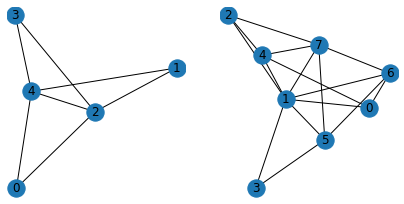

In [39]:
import networkx as nx, matplotlib.pyplot as plt
%matplotlib inline
#隣接リストをnx形式に変換（枝を加える）→描画
def drawEdgesUsingNx(nx_graph, list_edge, dic_pos, axval):
    nx_graph.add_edges_from(list_edge)
    axval.set_axis_off()
    nx.draw_networkx(nx_graph, pos=dic_pos, ax=axval)
#2つのグラフを描画
fig, npar_axval = plt.subplots(1, 2, figsize=(7, 3.5))
#1
list_edge_test1 = [(3, 2), (2, 1), (2, 4), (4, 3), (0, 4), (4, 1), (0, 2)]; nx_g1 = nx.Graph()
drawEdgesUsingNx(nx_g1, list_edge_test1, None, npar_axval[0])
#2
list_edge_test2 = [(0, 1), (2, 7), (4, 7), (1, 3), (7, 1), (5, 6), (7, 6), (6, 0), (2, 1), (1, 5), (7, 5), (1, 6), (0, 4), (4, 1), (2, 4), (5, 3)] ;nx_g2 = nx.Graph()
drawEdgesUsingNx(nx_g2, list_edge_test2, None, npar_axval[1])

上が `True` になった場合、大きめのグラフの以下のセルでも `True` が出ることを確認して下さい。

In [62]:
import random
random.seed(a=0)
edgenum_hugetest3 = 5000
nodenum_hugetest3 = 100
set_edge = set()
for i in range(edgenum_hugetest3):
    node1 = random.randint(0, nodenum_hugetest3-1)
    node2 = random.randint(0, nodenum_hugetest3-1)
    if node1 == node2:
        continue
    edge1 = (node1, node2)
    if edge1 in set_edge:
        continue
    edge2 = (node2, node1)
    if edge2 in set_edge:
        continue
    set_edge.add(edge1)
list_edge_hugetest3 = list(set_edge)
#print(len(list_edge_hugetest3))
list_trignale_hugetest3 = enumerateTriangles(list_edge_hugetest3, nodenum_hugetest3)
for triangle in list_trignale_hugetest3:
    triangle.sort()
list_trignale_hugetest3.sort()
print(len(list_trignale_hugetest3)==39241, list_trignale_hugetest3[100]==[0, 5, 39])

True True


更に大きなデータ（DBLPのグラフ）でも試してみて下さい。

In [63]:
import json
if 'list_edge_dblp' not in globals():
    with open("ex7_data_dblp_list_edge.json", "r", encoding="utf-8") as f:
        list_edge_dblp = json.load(f)
    nodenum_dblp = max([max(edge1) for edge1 in list_edge_dblp])+1
    list_tupedge_dblp = [(node1, node2) for node1, node2 in list_edge_dblp]
nodenum_dblp = max([max(edge1) for edge1 in list_edge_dblp])+1
print("頂点数:", nodenum_dblp)

頂点数: 390192


In [64]:
list_trignale_dblp2 = enumerateTriangles(list_tupedge_dblp, nodenum_dblp)
for triangle in list_trignale_dblp2:
    triangle.sort()
list_trignale_dblp2.sort()
print(len(list_trignale_dblp2)==1076081, list_trignale_dblp2[1000]==[204, 87987, 332173])

True True


模範解答は（環境によりますが）1,2秒で結果が求まります。

In [65]:
%%timeit -r 1 -n 1
enumerateTriangles(list_edge_dblp, nodenum_dblp)

46.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


以下のセルを実行すると解答セルのプログラムの計算量を自動的に評価します。

この課題の模範解答の時間計算量は<font color="white"> $O(mn)$ と評価されますが、正しくは $O(m^1.5)$です。</font>（←白黒反転しています）  
想像（模範解答）よりも大きな計算量となっている場合、どこに問題があるのか考えてみて下さい。

In [56]:
import utaadevalcpx;dic_varinfo_7_1 = {"list_edge": ["list", set(), {"m"}],"nodenum": ["int", set(), {"n"}],}
str_code_7_1 = '''...'''
utaadevalcpx.evaluateCpx(str_exfilename, "7-1", dic_varinfo_7_1, str_code_7_1) # str_exfilenameはファイルの冒頭で定義されています

('時間計算量：O(mmmn), ',
 '領域計算量：O(mmnn+mmmn)',
 '解答のコードには適宜コメントを入れて下さい。正しくても評価者が読解できない場合は減点となる可能性があります。')

同様に著名人が含まれる三角形の数を調べてみます。

頂点の番号 | 著者名 | 概要 
 - | - | - 
<font color=#008b8b>291399</font> | <font color=#008b8b>Shapley, Lloyd S.</font> | 2012年のノーベル経済学賞の受賞者。東大の進振りにも彼の考案したアルゴリズムが使われているとかいないとか
<font color=#ff7f50>275409</font> | <font color=#ff7f50>Roth, Alvin E.</font> | 2012年のノーベル経済学賞の受賞者
<font color=#006400>13067</font> | <font color=#006400>Allen, Paul G.</font> | マイクロソフトの創業者。沈没した軍艦を引き上げたりしている人の方
<font color=#aa4500>102714</font> | <font color=#aa4500>Gates, William H.</font> | マイクロソフトの創業者
<font color=#2f4f8f>234636</font> | <font color=#2f4f8f>Neumann, John von</font> | ノイマン型計算機の考案者
<font color=#c71585>60161</font> | <font color=#c71585>Chomsky, Noam</font> | 色々なところに顔を出す言語学者
<font color=#2e8b57>275334</font> | <font color=#2e8b57>Rossum, Guido van</font> | Ptyhonの考案者
<font color=#00008b>75861</font> | <font color=#00008b>Dijkstra, Edsger W.</font> | 計算機科学者。ダイクストラ。オランダ人

In [ ]:
import json
#著名人の通し番号を呼び出す
if 'list_IDfam_dblp' not in globals():
    with open("ex7_data_dblp_list_IDfam.json", "r", encoding="utf-8") as f:
        list_IDfam_dblp = json.load(f)
#極大三角形のリストを集合に変換する
list_settriangle_dblp2 = []
for triangle in list_trignale_dblp2:
    list_settriangle_dblp2.append(set(triangle))
#各著名人の極大三角形を調べる
print("名前: 三角形数 (極大三角形数)")
for index1, (node1, name1, str1) in enumerate(list_IDfam_dblp):
    tricnt = 0
    for triangle in list_settriangle_dblp2:
        if node1 in triangle:
            tricnt += 1
    print(name1, tricnt)

<b>問題の難易度評価：</b>
下のセルにこの問の難易度を5段階（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）で評価して下さい。（次回以降の課題の難易度の調整に使います）
また、解答するのにかかった時間や感想などがあれば適宜記載して下さい。

In [ ]:
#難易度（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）

#感想


## 2. グラフの直径

無向グラフ $G$ の枝を表す大きさ2のタプルを要素とするリスト `list_edge` と頂点数 `nodenum` が引数として与えられたとき、$G$ の直径の大きさを返す関数 `getDiameter` を作成して下さい。以下の点に注意して下さい。

1. 各点は `0` から `nodenum-1` までの整数で表されます。すなわち、 `list_edge` を構成する大きさ2のタプルの要素は、 `0` から `nodenum-1` までの整数です。
2. $G$を構成する点$v$と$u$の間に枝がある場合、`(u, v)`、もしくは `(v, u)` が `list_edge` に含まれます。 
  * `(u, v)` と `(v, u)` の両方が `list_edge` には含まれることはありません。
3. 同じ値は2個以上 `list_edge` には含まれません。
4. ただし、任意の2点間には経路が存在する様なグラフが引数として与えられるものとします。
5. （ヒント）<font color="white">グラフの2点間の最短距離を求める必要がある場合、本課題4の（模範）解答を参考にして下さい。</font>

なお、各値の大きさは以下の通りとします。

* $m =$ $G$ の枝の数
* $n =$ $G$ の点の数 (`nodenum`)
* $k =$ $G$ の点の中で最大の隣接点数



以下のセルの `...` のところを書き換えて解答して下さい。

In [70]:
### この行のコメントを改変してはいけません %7-2% ### 
#解答用セル
from collections import deque # モジュールを使わない場合、この行は削除して良い
def getDiameter(list_edge, nodenum):
    list_adjlist = [None]*nodenum
    for i in range(nodenum):
        list_adjlist[i] = []
    for node1, node2 in list_edge:
        list_adjlist[node1].append(node2)
        list_adjlist[node2].append(node1)
    list_D = [0]*nodenum
    list_D[0] = 0
    q = deque(0)
    while(len(q)>0):
        node1 = q.pop
        for adjnode in list_adjlist[node1]:
            if list_D[adjnode] is not None:
                continue
            q.append(adjnode)
            list_D[adjnode] = list_D[node1] + 1
    print(list_D)
    return list_D

上のセルで解答を作成した後、以下のセルを実行し、実行結果が全て `True` になることを確認して下さい。

In [71]:
list_edge_test1 = [(3, 2), (2, 1), (2, 4), (4, 3), (0, 4), (4, 1), (0, 2)]
nodenum_test1 = 5
print(getDiameter(list_edge_test1, nodenum_test1)==2)
list_edge_test2 = [(0, 1), (2, 7), (4, 7), (1, 3), (7, 1),  (7, 6), (6, 0), (2, 1), (1, 6), (0, 4), (2, 4), (5, 3)]
nodenum_test2 = 8
print(getDiameter(list_edge_test2, nodenum_test2)==4)

TypeError: 'int' object is not iterable

なお、テストで用いているグラフは以下の様な形になっています。

In [ ]:
import networkx as nx, matplotlib.pyplot as plt
%matplotlib inline
#隣接リストをnx形式に変換（枝を加える）→描画
def drawEdgesUsingNx(nx_graph, list_edge, dic_pos, axval):
    nx_graph.add_edges_from(list_edge)
    axval.set_axis_off()
    nx.draw_networkx(nx_graph, pos=dic_pos, ax=axval)
#2つのグラフを描画
fig, npar_axval = plt.subplots(1, 2, figsize=(7, 3.5))
#1
list_edge_test1 = [(3, 2), (2, 1), (2, 4), (4, 3), (0, 4), (4, 1), (0, 2)]; nx_g1 = nx.Graph()
drawEdgesUsingNx(nx_g1, list_edge_test1, None, npar_axval[0])
#2
list_edge_test2 = [(0, 1), (2, 7), (4, 7), (1, 3), (7, 1),  (7, 6), (6, 0), (2, 1), (1, 6), (0, 4), (2, 4), (5, 3)] ;nx_g2 = nx.Graph()
drawEdgesUsingNx(nx_g2, list_edge_test2, None, npar_axval[1])

上が `True` になった場合、大きめのグラフの以下のセルでも `True` が出ることを確認して下さい。

In [ ]:
#ランダムに木を作成する
import random 
def constructRandomTree(nodenum, maxchildnum):
    random.seed(a=0)
    #枝リスト
    list_edge = []
    #FIFOを使う
    FIFO = FIFOClass()
    #根は0
    nodecnt = 0
    FIFO.enqueue(nodecnt)
    nodecnt += 1
    while(len(FIFO.list_data) > 0):
        #新しく子供を作成する点
        node1 = FIFO.dequeue()
        #点node1の子供数を決定
        childnum = random.randint(0, maxchildnum)
        #キューに何も入ってない場合、必ず子供は1つ以上
        if len(FIFO.list_data) == 0 and childnum == 0:
            childnum = random.randint(1, maxchildnum)
        for adjnode in range(childnum):
            list_edge.append((node1, nodecnt))
            FIFO.enqueue(nodecnt)
            nodecnt += 1
            #点の数が指定数に到達したら終了
            if nodecnt == nodenum:
                break
        #点の数が指定数に到達したら終了
        if nodecnt == nodenum:
            #子供がない点のリストを空にしておく
            node1 += 1
            while(node1 < nodenum):
                node1 += 1
            break
    return list_edge
nodenum_hugetest4 = 50000
maxchildnum_hugetest4 = 5
list_edge_hugetest4 = constructRandomTree(nodenum_hugetest4, maxchildnum_hugetest4)
list_edge_hugetest4c = list_edge_hugetest4.copy()
print(getDiameter(list_edge_hugetest4c, nodenum_hugetest4)==23)
# 適当に枝を足してグラフにする
extraedgenum_hugetest4 = 10000
set_edge_hugetest4 = set()
for i in range(extraedgenum_hugetest4):
    node1 = random.randint(0, nodenum_hugetest4-1)
    node2 = random.randint(0, nodenum_hugetest4-1)
    if node1 == node2:
        continue
    edge1 = (node1, node2)
    if edge1 in set_edge_hugetest4:
        continue
    edge2 = (node2, node1)
    if edge2 in set_edge_hugetest4:
        continue
    set_edge_hugetest4.add(edge1)
list_edge_hugetest4 += list(set_edge_hugetest4)
list_edge_hugetest4c = list_edge_hugetest4.copy()
print(getDiameter(list_edge_hugetest4c, nodenum_hugetest4)==19)

DBLPのグラフの直径を求めてみます（少し時間がかかります）。

In [ ]:
import json
if 'list_edge_dblp' not in globals():
    with open("ex7_data_dblp_list_edge.json", "r", encoding="utf-8") as f:
        list_edge_dblp = json.load(f)
    nodenum_dblp = max([max(edge1) for edge1 in list_edge_dblp])+1
    list_tupedge_dblp = [(node1, node2) for node1, node2 in list_edge_dblp]
nodenum_dblp = max([max(edge1) for edge1 in list_edge_dblp])+1
print(getDiameter(list_edge_dblp, nodenum_dblp)==24)

以下のセルを実行すると解答セルのプログラムの計算量を自動的に評価します。

この課題の模範解答の時間計算量は<font color="white"> $O(mm+n)$、もしくは $O(m+n)$ と評価されますが、正しくは $O(m+n)$です。</font>（←白黒反転しています）  
想像（模範解答）よりも大きな計算量となっている場合、どこに問題があるのか考えてみて下さい。

In [ ]:
import utaadevalcpx;dic_varinfo_7_2 = {"list_edge": ["list", set(), {"m"}],"nodenum": ["int", set(), {"n"}],}
str_code_7_2 = '''...'''
utaadevalcpx.evaluateCpx(str_exfilename, "7-2", dic_varinfo_7_2, str_code_7_2) # str_exfilenameはファイルの冒頭で定義されています

`networkx` との時間を比較します。

模範解答では300ミリ秒前後ですが、`networkx` は止まりません。（実行した場合は手動で止めて下さい）

In [ ]:
list_edge_hugetest4c = list_edge_hugetest4.copy()

In [ ]:
%%timeit -r 1 -n 1
getDiameter(list_edge_hugetest4c, nodenum_hugetest4)

In [ ]:
nx_g1 = nx.Graph(); nx_g1.add_edges_from(list_edge_hugetest4c)

In [ ]:
%%timeit -r 1 -n 1
nx.algorithms.distance_measures.diameter(nx_g1)

<b>問題の難易度評価：</b>
下のセルにこの問の難易度を5段階（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）で評価して下さい。（次回以降の課題の難易度の調整に使います）
また、解答するのにかかった時間や感想などがあれば適宜記載して下さい。

In [ ]:
#難易度（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）

#感想
